In [3]:
import seaborn as sns

import polars as pl
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Создание датасета

In [44]:
sales = pl.read_csv('../data/shop_sales.csv')
sales.head()


item_id,store_id,date_id,cnt
str,str,i64,i64
"""STORE_2_085""","""STORE_2""",1,3
"""STORE_2_085""","""STORE_2""",2,8
"""STORE_2_085""","""STORE_2""",3,0
"""STORE_2_085""","""STORE_2""",4,3
"""STORE_2_085""","""STORE_2""",5,0


In [45]:
sales = sales.filter(pl.col('store_id') == 'STORE_1')

In [46]:
sales.select('item_id').n_unique()

15

In [47]:
calendar = pl.read_csv('../data/shop_sales_dates.csv')
calendar.head()

date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
str,i64,str,i64,i64,i64,str,str,str,str,i64,i64,i64,i64
"""2011-01-29""",11101,"""Saturday""",1,1,2011,null,null,null,null,1,0,0,0
"""2011-01-30""",11101,"""Sunday""",2,1,2011,null,null,null,null,2,0,0,0
"""2011-01-31""",11101,"""Monday""",3,1,2011,null,null,null,null,3,0,0,0
"""2011-02-01""",11101,"""Tuesday""",4,2,2011,null,null,null,null,4,0,1,1
"""2011-02-02""",11101,"""Wednesday""",5,2,2011,null,null,null,null,5,1,1,0


In [48]:
prices = pl.read_csv('../data/shop_sales_prices.csv')
prices.head()

store_id,item_id,wm_yr_wk,sell_price
str,str,i64,f64
"""STORE_2""","""STORE_2_085""",11101,1.0
"""STORE_2""","""STORE_2_043""",11101,2.88
"""STORE_2""","""STORE_2_054""",11101,2.28
"""STORE_2""","""STORE_2_090""",11101,1.25
"""STORE_2""","""STORE_2_252""",11101,1.48


In [49]:
sales.shape

(27285, 4)

In [50]:
sales = (
    sales
    .join(calendar, on='date_id', how='left')
    .join(prices, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')
    .fill_null(0)
)

In [51]:
sales.shape

(27285, 18)

In [52]:
assert sales['date'].n_unique()*sales['item_id'].n_unique() == sales.height

In [53]:
sales.write_csv('../data/store1_data.csv')

In [26]:
art_list = sales.select('item_id').unique().to_numpy()
art_list

array([['STORE_1_065'],
       ['STORE_1_584'],
       ['STORE_1_547'],
       ['STORE_1_587'],
       ['STORE_1_555'],
       ['STORE_1_325'],
       ['STORE_1_339'],
       ['STORE_1_376'],
       ['STORE_1_064'],
       ['STORE_1_090'],
       ['STORE_1_252'],
       ['STORE_1_546'],
       ['STORE_1_714'],
       ['STORE_1_727'],
       ['STORE_1_586']], dtype=object)

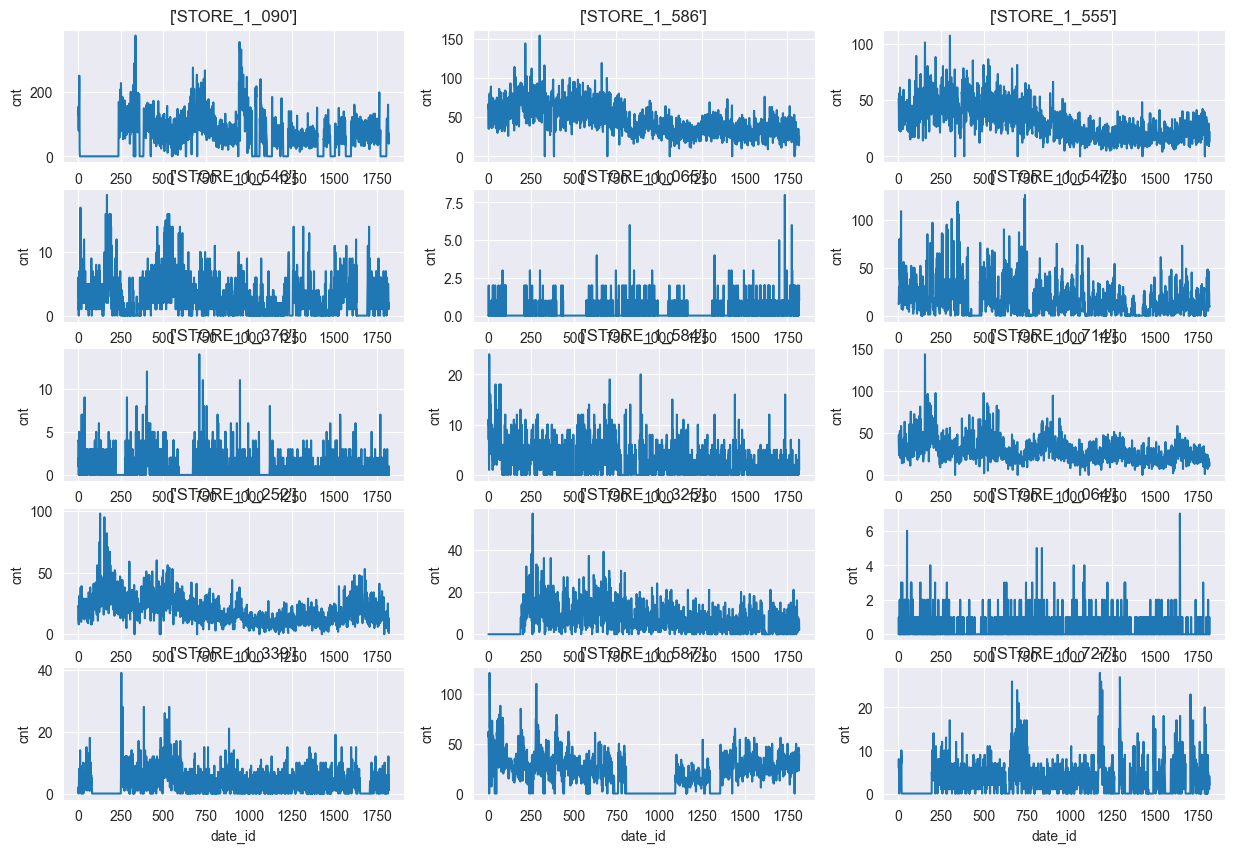

In [5]:
fig, ax = plt.subplots(5, 3, figsize=(15, 10))

for i, art in enumerate(art_list):
    cur_ax = ax[i//3][i%3]
    sns.lineplot(
        data=sales.filter(pl.col('item_id') == art),
        x='date_id', y='cnt',ax=cur_ax
    )
    cur_ax.set_title(f'{art}')

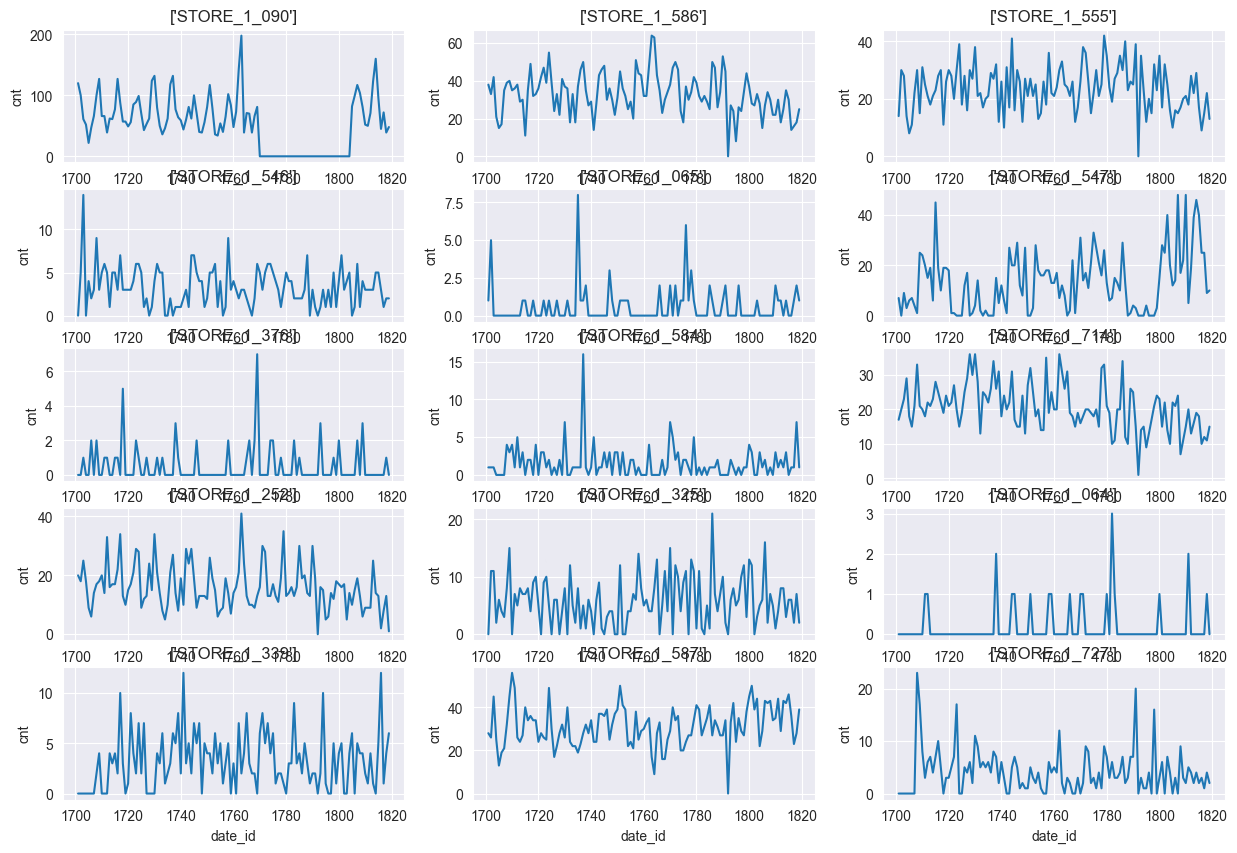

In [13]:
fig, ax = plt.subplots(5, 3, figsize=(15, 10))

for i, art in enumerate(art_list):
    cur_ax = ax[i//3][i%3]
    sns.lineplot(
        data=sales.filter((pl.col('item_id') == art) & (pl.col('date_id') > 1700)),
        x='date_id', y='cnt',ax=cur_ax
    )
    cur_ax.set_title(f'{art}')

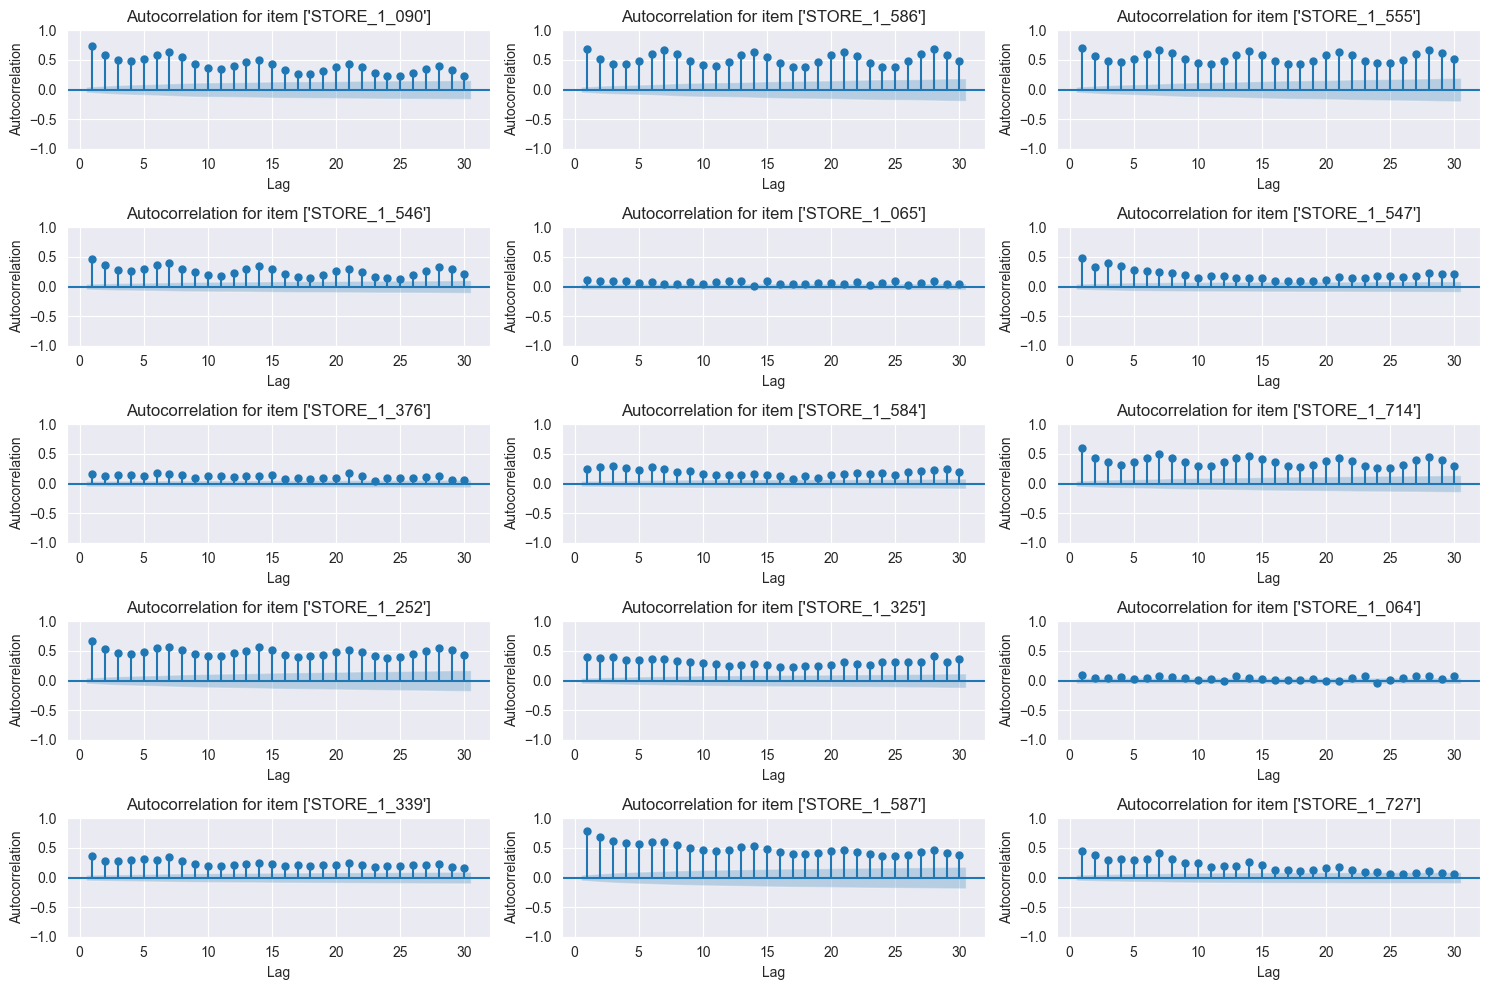

In [17]:
from statsmodels.graphics.tsaplots import plot_acf


fig, ax = plt.subplots(5, 3, figsize=(15, 10))
for i, item in enumerate(art_list):
    cur_ax = ax[i//3][i%3]
    group = sales.filter(pl.col("item_id") == item).sort("date_id")
    # Extract count values as numpy array
    ts_values = group["cnt"].to_numpy()


    plot_acf(ts_values, ax=cur_ax, lags=30, zero=False)
    cur_ax.set_title(f"Autocorrelation for item {item}")
    cur_ax.set_xlabel("Lag")
    cur_ax.set_ylabel("Autocorrelation")
plt.tight_layout()
plt.show()

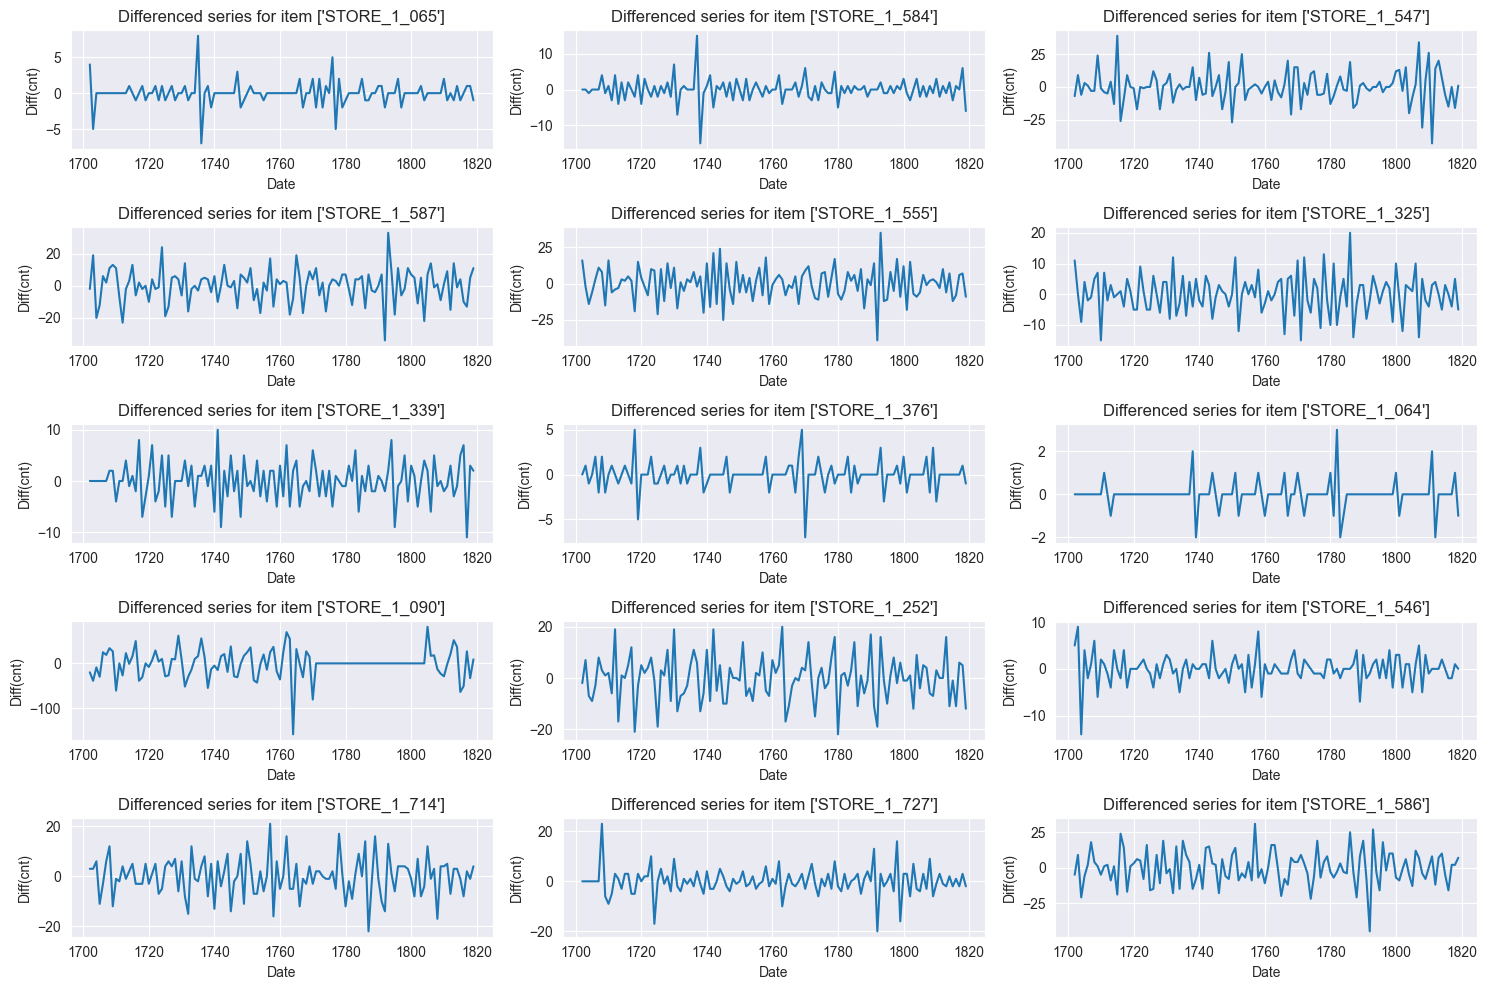

In [43]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

fig, ax = plt.subplots(5, 3, figsize=(15, 10))
for i, item in enumerate(art_list):
    cur_ax = ax[i//3][i%3]

    group = sales.filter(pl.col("item_id") == item).sort("date_id").filter(pl.col('date_id') > 1700)
    dates = group["date_id"].to_numpy()
    ts = group["cnt"].to_numpy()

    ts_diff = np.diff(ts)
    diff_dates = dates[1:]


    cur_ax.plot(diff_dates, ts_diff)
    cur_ax.set_title(f"Differenced series for item {item}")
    cur_ax.set_xlabel("Date")
    cur_ax.set_ylabel("Diff(cnt)")


plt.tight_layout()
plt.show()

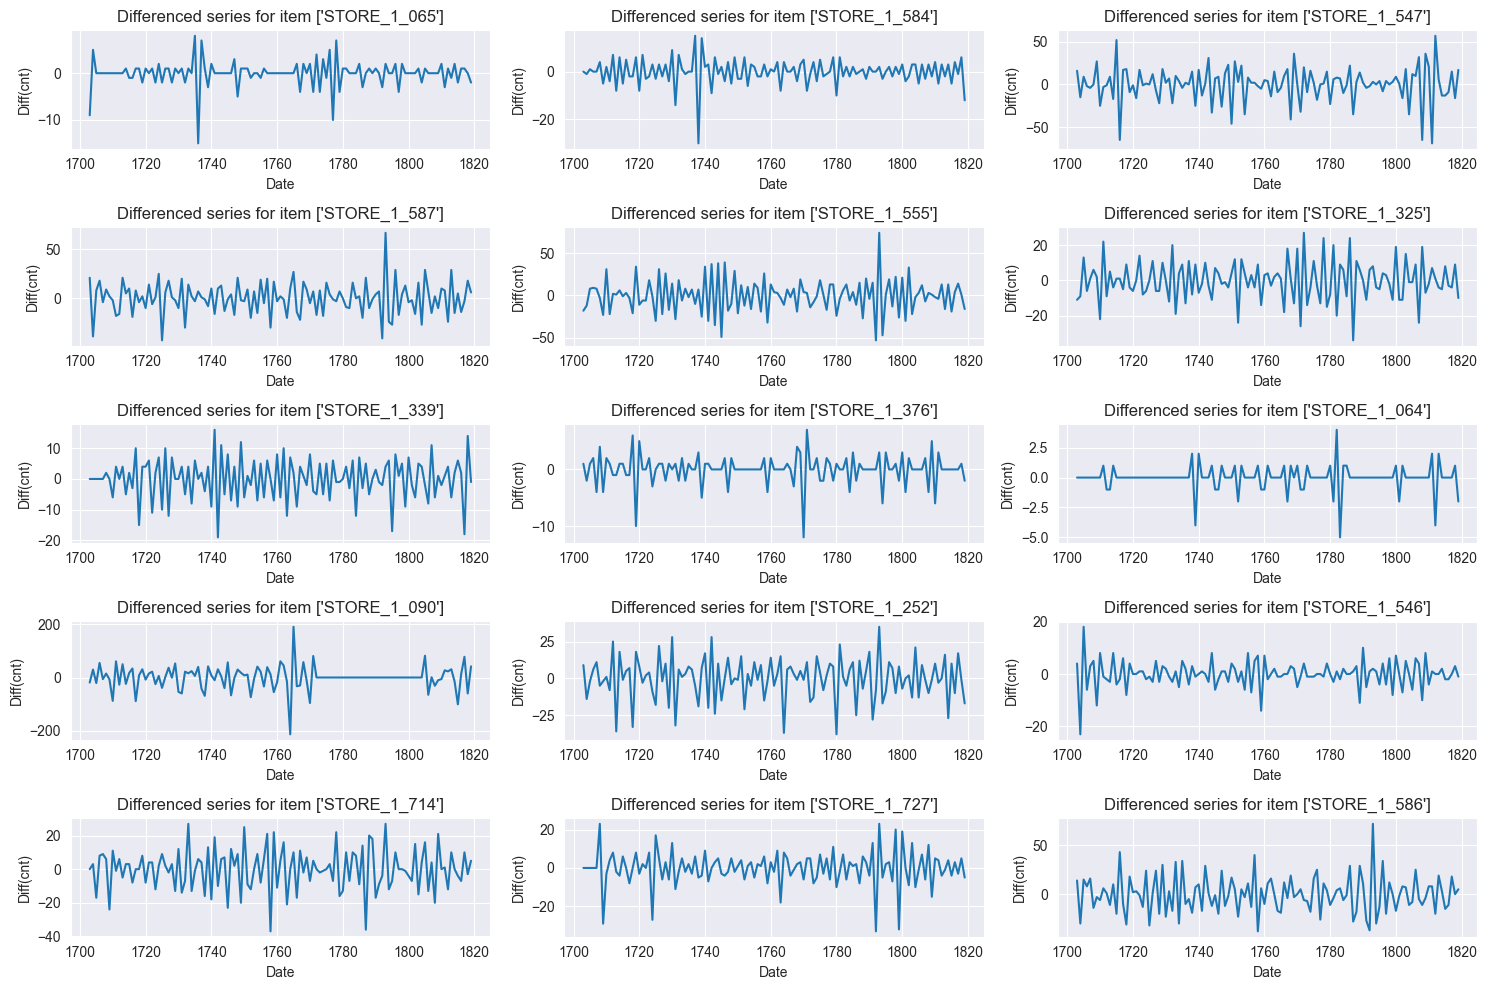

In [54]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

fig, ax = plt.subplots(5, 3, figsize=(15, 10))
for i, item in enumerate(art_list):
    cur_ax = ax[i//3][i%3]

    group = sales.filter(pl.col("item_id") == item).sort("date_id").filter(pl.col('date_id') > 1700)
    dates = group["date_id"].to_numpy()
    ts = group["cnt"].to_numpy()

    ts_diff = np.diff(ts, n=2)
    diff_dates = dates[2:]


    cur_ax.plot(diff_dates, ts_diff)
    cur_ax.set_title(f"Differenced series for item {item}")
    cur_ax.set_xlabel("Date")
    cur_ax.set_ylabel("Diff(cnt)")


plt.tight_layout()
plt.show()

In [22]:
sales.filter(pl.col('item_id') == 'STORE_1_064').height

1819

In [20]:
import statsforecast

In [29]:
data = sales.filter(pl.col('item_id') == 'STORE_1_064')

In [34]:
from statsforecast import StatsForecast

from statsforecast.models import GARCH, ARIMA

In [64]:
sf = statsforecast.StatsForecast(freq=1, models=[ARIMA(), GARCH()])

In [53]:
data

unique_id,store_id,ds,y
str,str,i64,i64
"""STORE_1_064""","""STORE_1""",1,0
"""STORE_1_064""","""STORE_1""",2,1
"""STORE_1_064""","""STORE_1""",3,0
"""STORE_1_064""","""STORE_1""",4,0
"""STORE_1_064""","""STORE_1""",5,0
…,…,…,…
"""STORE_1_727""","""STORE_1""",1815,2
"""STORE_1_727""","""STORE_1""",1816,3
"""STORE_1_727""","""STORE_1""",1817,1


In [56]:
data = (
    sales
    .filter(pl.col('store_id') == 'STORE_1')
    .rename({'item_id': 'unique_id', 'date_id': 'ds', 'cnt': 'y'})
    .select('unique_id', 'ds', 'y')
)

In [57]:
sf.fit(data)

StatsForecast(models=[ARIMA,GARCH(1,1)])

In [58]:
sf

StatsForecast(models=[ARIMA,GARCH(1,1)])

In [63]:
sf.predict(h=30, level=[0.05, 0.95])

unique_id,ds,ARIMA,ARIMA-lo-0.95,ARIMA-lo-0.05,ARIMA-hi-0.05,ARIMA-hi-0.95,"GARCH(1,1)","GARCH(1,1)-lo-0.95","GARCH(1,1)-lo-0.05","GARCH(1,1)-hi-0.05","GARCH(1,1)-hi-0.95"
str,i64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
"""STORE_1_064""",1820,0.335349,0.327239,0.334922,0.335776,0.343459,0.973525,0.969248,0.9733,0.97375,0.977802
"""STORE_1_064""",1821,0.335349,0.327239,0.334922,0.335776,0.343459,-0.37284,-0.377263,-0.373073,-0.372607,-0.368417
"""STORE_1_064""",1822,0.335349,0.327239,0.334922,0.335776,0.343459,-0.320261,-0.324639,-0.320492,-0.320031,-0.315883
"""STORE_1_064""",1823,0.335349,0.327239,0.334922,0.335776,0.343459,-0.646805,-0.651132,-0.647033,-0.646577,-0.642478
"""STORE_1_064""",1824,0.335349,0.327239,0.334922,0.335776,0.343459,0.523079,0.518729,0.52285,0.523308,0.527429
…,…,…,…,…,…,…,…,…,…,…,…
"""STORE_1_727""",1845,3.481551,3.436715,3.479191,3.483911,3.526386,-2.131356,-2.247057,-2.137445,-2.125267,-2.015654
"""STORE_1_727""",1846,3.481551,3.436715,3.479191,3.483911,3.526386,-0.377189,-0.489359,-0.383092,-0.371285,-0.265019
"""STORE_1_727""",1847,3.481551,3.436715,3.479191,3.483911,3.526386,-2.764551,-2.868473,-2.770021,-2.759082,-2.66063
